Training the CNN...
Cost after iteration 0: 1.044570781594895
Cost after iteration 100: 1.2726734210729718
Cost after iteration 200: 1.7530720430431002
Cost after iteration 300: 2.4471780029289825
Cost after iteration 400: 3.348668502658612
Cost after iteration 500: 4.452139505865651
Cost after iteration 600: 5.754365919249445
Cost after iteration 700: 7.238086376870428
Cost after iteration 800: 8.90776637223968
Cost after iteration 900: 10.768926113050213


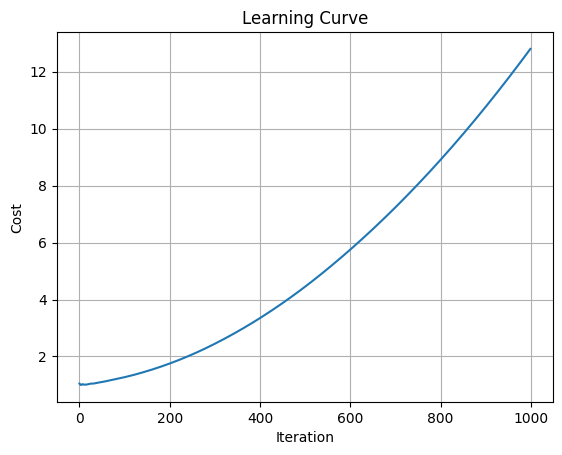

In [4]:
import numpy as np
import matplotlib.pyplot as plt

class ConvolutionalNeuralNetwork:
    def __init__(self, input_shape, filter_size, num_filters):
        # Initialize CNN parameters
        self.input_shape = input_shape
        self.filters = np.random.randn(num_filters, filter_size, filter_size) * 0.1  # Initialize filters with small values
        self.biases = np.zeros(num_filters)  # Biases initialized to zero
        self.lambda_reg = 0.01  # L2 regularization parameter
        self.learning_rate = 0.01  # Learning rate

    def forward_prop(self, X):
        # X: Input data with shape (m, h, w), where m = number of samples, h = height, w = width
        m, h, w = X.shape
        num_filters, filter_size, _ = self.filters.shape  # num_filters = number of filters
        h_out = h - filter_size + 1  # Output height after convolution
        w_out = w - filter_size + 1  # Output width after convolution

        Z = np.zeros((m, num_filters, h_out, w_out))  # Initialize the output of the convolution (activation map)

        # Perform convolution with ReLU activation
        for i in range(m):
            for fi in range(num_filters):
                for hi in range(h_out):
                    for wi in range(w_out):
                        # Perform the convolution operation (filter * image region + bias)
                        Z[i, fi, hi, wi] = np.sum(X[i, hi:hi+filter_size, wi:wi+filter_size] * self.filters[fi]) + self.biases[fi]
        return np.maximum(0, Z)  # Apply ReLU activation

    def backward_prop(self, X, dZ):
        m, h, w = X.shape
        num_filters, filter_size, _ = self.filters.shape
        dW = np.zeros_like(self.filters)
        db = np.zeros_like(self.biases)

        # Compute gradients for weights (filters) and biases
        for i in range(m):
            for fi in range(num_filters):
                for hi in range(dZ.shape[2]):
                    for wi in range(dZ.shape[3]):
                        # Compute the gradients for each filter and bias
                        dW[fi] += X[i, hi:hi+filter_size, wi:wi+filter_size] * dZ[i, fi, hi, wi]
                        db[fi] += dZ[i, fi, hi, wi]

        # L2 regularization gradient for filters
        dW += self.lambda_reg * self.filters
        return {'dW': dW / m, 'db': db / m}

    def optimize(self, X, Y, num_iterations=1000):
        costs = []
        v_W = np.zeros_like(self.filters)  # Initialize momentum for filters
        v_b = np.zeros_like(self.biases)  # Initialize momentum for biases
        beta = 0.9  # Momentum parameter

        for i in range(num_iterations):
            # Forward propagation
            Z = self.forward_prop(X)

            # Calculate the cost (Mean Squared Error + L2 regularization)
            cost = np.mean((Z - Y) ** 2) + (self.lambda_reg / 2) * np.sum(self.filters ** 2)
            costs.append(cost)

            # Backward propagation
            dZ = 2 * (Z - Y)  # Derivative of MSE loss
            grads = self.backward_prop(X, dZ)

            # Update filters and biases with momentum
            v_W = beta * v_W + (1 - beta) * grads['dW']
            v_b = beta * v_b + (1 - beta) * grads['db']

            self.filters -= self.learning_rate * v_W
            self.biases -= self.learning_rate * v_b

            if i % 100 == 0:
                print(f"Cost after iteration {i}: {cost}")

        return costs

# Test the implementation
np.random.seed(42)

# Generate random input data: 5 samples of 14x14 images
X = np.random.randn(5, 14, 14)

# Generate random output data (target): assuming 12x12 output after convolution with a 3x3 receptive field
# The target shape should match the output size of the convolution.
Y = np.random.randn(5, 12, 12)  # Updated the target shape to match the expected output

# Initialize the CNN with input shape (14, 14), filter size 3, and 5 filters
cnn = ConvolutionalNeuralNetwork(input_shape=(14, 14), filter_size=3, num_filters=5)

# Train the CNN
print("Training the CNN...")
costs = cnn.optimize(X, Y, num_iterations=1000)

# Plot learning curve
plt.plot(costs)
plt.title('Learning Curve')
plt.xlabel('Iteration')
plt.ylabel('Cost')
plt.grid(True)
plt.show()
